In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk
#import networkx as nx
import re 

path = "c:/Facultad/Tesis/"
base = pd.read_csv(path+'Corpus_medios_nac.csv')

C:\Users\Asus\AppData\Local\Temp\ipykernel_18668\1846437740.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv(path+'Corpus_medios_nac.csv')


In [2]:
def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    
    return x

def extract_quotes(x):
    return re.findall('"([^"]*)"', x)

def words_length(x):
    return len(x.split(" "))

def pre_process_quoted(df):
    df['nota'] = df['nota'].apply(replace)
    df['citas']  = df['nota'].apply(extract_quotes)
    df_quoutes2 = pd.DataFrame({'Fecha': df['fecha'].iloc[1:], 'Hora': df['hora'].iloc[1:], 'Cita': df['citas'].iloc[1:], 'Link': df['link'].iloc[1:], 'Nota': df['nota'].iloc[1:]})
    df_quoutes = df_quoutes2.explode('Cita') # Cada cita sea una fila distinta
    df_quoutes = df_quoutes.dropna(subset=['Cita']) # Elimino la filas que no haya quotes

    #df_quoutes['Citas'] = df_quoutes['Citas'].apply(replace)

    df_quoutes = df_quoutes.reset_index()
    df_quoutes = df_quoutes.drop(['index'], axis = 1)
    df_quoutes['Cant_Palabras'] = df_quoutes['Cita'].apply(words_length) # genero columna que cuente la cantidad de plabaras
    df_quoutes_pf = df_quoutes[df_quoutes['Cant_Palabras'] > 4]
    df_quoutes_pf = df_quoutes_pf[df_quoutes_pf['Cant_Palabras'] < 60]
    df_quoutes_pf = df_quoutes_pf.reset_index()
    df_quoutes_pf = df_quoutes_pf.drop(['index'], axis = 1)
    return df_quoutes_pf

In [3]:
base['fecha'] = pd.to_datetime(base['fecha'])
#fecha_inicio = pd.to_datetime('2019-01-01')
#fecha_fin = pd.to_datetime('2019-04-01')

# 6 Meses
fecha_inicio = pd.to_datetime('2020-06-01')
fecha_fin = pd.to_datetime('2021-01-01')

#Barcos
#fecha_inicio = pd.to_datetime('2021-06-01')
#fecha_fin = pd.to_datetime('2021-08-01')
tres_meses = base[(base['fecha'] >= fecha_inicio) & (base['fecha'] <= fecha_fin)]
filt_tres_meses = pre_process_quoted(tres_meses)


C:\Users\Asus\AppData\Local\Temp\ipykernel_18668\4064238392.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nota'] = df['nota'].apply(replace)
C:\Users\Asus\AppData\Local\Temp\ipykernel_18668\4064238392.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['citas']  = df['nota'].apply(extract_quotes)


In [42]:
pathGit = 'c:/Git_Proyects/Tesis/Base_Medios_Arg/'
clusters = pk.load(open(pathGit+'clusters_threshold_85_barcos.pk', 'rb'))
frases = pk.load(open(pathGit+'nac_barcos.pk', 'rb'))

In [4]:
pathGit = 'c:/Git_Proyects/Tesis/Base_Medios_Arg/'
clusters = pk.load(open(pathGit+'clusters_threshold_85_nac_6_meses.pk', 'rb'))
frases = pk.load(open(pathGit+'nac_6_meses.pk', 'rb'))

In [5]:
cluste_map = {frases[j]: str(i+1) for i, clus in enumerate(clusters) for j in clus}

In [6]:
filt_tres_meses['id_cluster'] = filt_tres_meses['Cita'].map(cluste_map)
filt_tres_meses.dropna(subset=['id_cluster'])

,Fecha,Hora,Cita,Link,Nota,Cant_Palabras,id_cluster
0,2020-06-01,NaN,Serán de interés las nuevas previsiones econ...,https://www.ambito.com/economia/se-reune-el-bc...,Comienza una semana en la que los mercados seg...,53,70600
1,2020-06-01,NaN,que potencialmente limita las futuras acciones...,https://www.ambito.com/economia/se-reune-el-bc...,Comienza una semana en la que los mercados seg...,12,70601
2,2020-06-01,NaN,haría peligrar la cadena productiva del país,https://www.ambito.com/economia/dolar/se-suman...,Por Andrés Randazzo Las nuevas medidas di...,7,70602
3,2020-06-01,NaN,el propósito es garantizar que estas medidas ...,https://www.ambito.com/economia/dolar/se-suman...,Por Andrés Randazzo Las nuevas medidas di...,25,28691
4,2020-06-01,NaN,llena de incertidumbre al comercio exterior y ...,https://www.ambito.com/economia/dolar/se-suman...,Por Andrés Randazzo Las nuevas medidas di...,37,70603
...,...,...,...,...,...,...,...
470190,2021-01-01,NaN,Tenemos ahora un desafío: que esa unidad que ...,https://www.losprimeros.tv/nota/politica/25197...,El presidenteAlberto Fernándezpublicó un men...,30,399
470191,2021-01-01,NaN,Construimos y equipamos hospitales en tiempo r...,https://www.losprimeros.tv/nota/politica/25197...,El presidenteAlberto Fernándezpublicó un men...,57,2399
470192,2021-01-01,NaN,Aseguramos que cada compatriota pudiera atende...,https://www.losprimeros.tv/nota/politica/25197...,El presidenteAlberto Fernándezpublicó un men...,17,6439
470193,2021-01-01,NaN,"gracias al trabajo de todos y todas, hoy nuest...",https://www.losprimeros.tv/nota/politica/25197...,El presidenteAlberto Fernándezpublicó un men...,22,1464


In [8]:
sorted(list(set(filt_tres_meses['id_cluster'])))

['1',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100001',
 '100002',
 '100003',
 '100004',
 '100005',
 '100006',
 '100007',
 '100008',
 '100009',
 '10001',
 '100010',
 '100011',
 '100012',
 '100013',
 '100014',
 '100015',
 '100016',
 '100017',
 '100018',
 '100019',
 '10002',
 '100020',
 '100021',
 '100022',
 '100023',
 '100024',
 '100025',
 '100026',
 '100027',
 '100028',
 '100029',
 '10003',
 '100030',
 '100031',
 '100032',
 '100033',
 '100034',
 '100035',
 '100036',
 '100037',
 '100038',
 '100039',
 '10004',
 '100040',
 '100041',
 '100042',
 '100043',
 '100044',
 '100045',
 '100046',
 '100047',
 '100048',
 '100049',
 '10005',
 '100050',
 '100051',
 '100052',
 '100053',
 '100054',
 '100055',
 '100056',
 '100057',
 '100058',
 '100059',
 '10006',
 '100060',
 '100061',
 '100062',
 '100063',
 '100064',
 '100065',
 '100066',
 '100067',
 '100068',
 '100069',
 '10007',
 '100070',
 '100071',
 '100072',
 '100073',
 '100074',
 '100075',
 '100076',
 '100077',
 '100078',
 '100079',
 '10008',


In [9]:
for i in range(100000):
    cluster_1 = filt_tres_meses[filt_tres_meses['id_cluster'] == str(i)]
    fechas = list(set(cluster_1['Fecha']))
    if len(fechas)>50:
        print(i, '= ',len(fechas))

3 =  90
41 =  67


KeyboardInterrupt: 

(array([18414., 18444., 18475., 18506., 18536., 18567., 18597.]),
 [Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08'),
  Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10'),
  Text(18567.0, 0, '2020-11'),
  Text(18597.0, 0, '2020-12')])

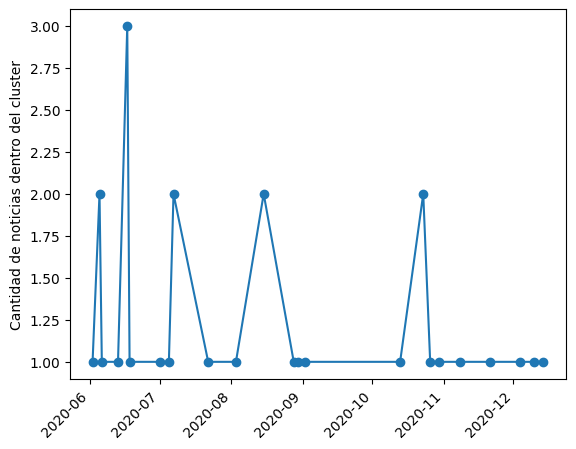

In [34]:
cluster_1 = filt_tres_meses[filt_tres_meses['id_cluster'] == '117']
#cluster_1 = cluster_1.drop_duplicates(subset='Link')
conteo_fechas = cluster_1['Fecha'].value_counts().reset_index()
cont_ordenado = conteo_fechas.sort_values('Fecha')
plt.figure()
plt.plot(cont_ordenado['Fecha'], cont_ordenado['count'], 'o-')
plt.ylabel('Cantidad de noticias dentro del cluster')
plt.xticks(rotation=45, ha='right')


In [7]:
from collections import Counter
frecuencia = Counter(cluste_map.values())
frecuencia


Counter({'1': 156,
         '7': 71,
         '4': 63,
         '13': 51,
         '31': 48,
         '24': 44,
         '44': 42,
         '17': 39,
         '59': 38,
         '35': 33,
         '15': 32,
         '110': 30,
         '102': 29,
         '23': 28,
         '52': 28,
         '27': 27,
         '42': 26,
         '117': 26,
         '123': 25,
         '159': 25,
         '80': 22,
         '140': 20,
         '304': 20,
         '29': 19,
         '61': 19,
         '101': 19,
         '345': 19,
         '49': 18,
         '244': 18,
         '292': 18,
         '382': 18,
         '69': 17,
         '131': 17,
         '234': 17,
         '326': 17,
         '344': 17,
         '450': 17,
         '8': 16,
         '19': 16,
         '45': 16,
         '71': 16,
         '91': 16,
         '63': 15,
         '104': 15,
         '118': 15,
         '169': 15,
         '612': 15,
         '616': 15,
         '78': 14,
         '144': 14,
         '528': 14,
         '

In [33]:
cluste_map
[k for k, v in cluste_map.items() if v == '117']


['antes de la pandemia del coronavirus',
 'diseñados para mitigar los efectos originados por la pandemia de coronavirus',
 'ante la realidad impuesta por la pandemia de coronavirus',
 'en este contexto de crisis económica debido a la pandemia de coronavirus ',
 ' debido a la pandemia de coronavirus pero en la cual ',
 ': la pandemia del coronavirus y la ',
 'el contexto de la grave pandemia de coronavirus',
 'el contexto de la pandemia de coronavirus',
 'la grave pandemia de coronavirus',
 ' de la pandemia de coronavirus ',
 ' durante la pandemia de coronavirus.También, el PJ consideró hoy ',
 'seriamente agravada como consecuencia de la pandemia de coronavirus',
 'la evolución de la pandemia de coronavirus',
 ' en medio de la pandemia de coronavirus.',
 ' en el contexto de la pandemia de coronavirus y la multiplicación de casos.',
 ' y asumió que ahora el problema de la pandemia de coronavirus ',
 ' en medio de la pandemia por coronavirus y la ',
 '.Por la pandemia de coronavir

(15706.0, 19358.0)

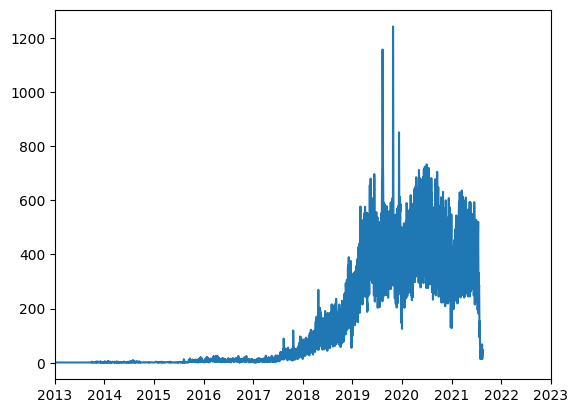

In [22]:
from datetime import datetime, timedelta

cantidad_por_fecha = base.groupby(base['fecha'].dt.date).size()
fechas = cantidad_por_fecha.index
cantidad = cantidad_por_fecha.values
plt.plot(fechas, cantidad)
fecha_fin = datetime(2023, 1, 1)  # Fecha de inicio deseada
fecha_inicio = datetime(2013, 1,1)  # Fecha de fin deseada
plt.xlim([fecha_inicio, fecha_fin])


(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

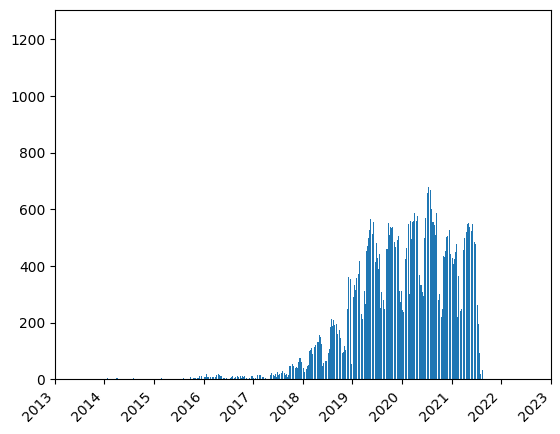

In [24]:
from datetime import datetime, timedelta
cantidad_por_fecha = base.groupby(base['fecha'].dt.date).size()
fechas = cantidad_por_fecha.index
cantidad = cantidad_por_fecha.values


plt.bar(fechas, cantidad)

fecha_fin = datetime(2023, 1, 1)  # Fecha de inicio deseada
fecha_inicio = datetime(2013, 1,1)  # Fecha de fin deseada
#ventana = timedelta(days=5*30)  # Intervalo de tiempo de 3 meses
intervalos = pd.date_range(start=fecha_inicio, end=fecha_fin)#, freq=ventana)
plt.xlim([intervalos[0], intervalos[-1]])
plt.xticks(rotation=45, ha='right')


In [8]:
base = pre_process_quoted(base)

In [16]:
for i,f  in enumerate(list(base['Cita'])):
    if 'de los barcos' in f:
        print(i,f )


19164 No tengo empacho en decir que soy un europeísta y esto tiene que ver directamente con la historia que tenemos en Argentina. Nuestra sociedad se formó con gente que bajaba de los barcos que llegaban de Europa
29809 Se podría decir que los dueños las pueden bajar directamente de los barcos
43185 limite la carga de los barcos y la eficiencia del suministro global
45084 Escribió alguna vez Octavio Paz que los mexicanos salieron de los indios, los brasileros salieron de la selva pero nosotros los argentinos llegamos de los barcos, y eran barcos que venían de Europa, y así construimos nuestra sociedad
45192 Escribió alguna vez Octavio Paz que los mexicanos salieron de los indios, los brasileros (sic) salieron de la selva pero nosotros los argentinos llegamos de los barcos, y eran barcos que venían de Europa, y así construimos nuestra sociedad
45195 Se afirmó más de una vez que los argentinos descendemos de los barcos. En la primera mitad del siglo XX recibimos a más de 5 m

In [28]:
base.loc[175338]

Fecha                                          2021-06-10 00:00:00
Hora                                                         00:00
Cita             Se afirmó más de una vez que 'los argentinos...
Link             https://www.clarin.com/politica/alberto-fernan...
Nota             El presidente Alberto Fernández pidió discul...
Cant_Palabras                                                   39
Name: 175338, dtype: object